In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akhilp

In [73]:
data_info = pandas.read_csv("NUSW-NB15_features.csv", encoding = "ISO-8859-1", header=None).values
features = data_info[:]
feature_names = features[:, 1]  # Names of the features in a list
feature_types = np.array([item.lower() for item in features[:, 2]])  # The types of the corresponding features in 'features_names'
 

In [74]:
# index arrays for different types of features
#nominal_cols = np.where(feature_types == "nominal")[0]
#integer_cols = np.where(feature_types == "integer")[0]
#binary_cols = np.where(feature_types == "binary")[0]
#float_cols = np.where(feature_types == "float")[0]



In [75]:
# arrays for names of the different types of features
#nominal_names = feature_names[nominal_cols]
#integer_names = feature_names[integer_cols]
#binary_names = feature_names[binary_cols]
#float_names = feature_names[float_cols]

In [76]:
dataframe1 = pandas.read_csv("UNSW.csv"       , names = feature_names, encoding = "ISO-8859-1", header=None)
dataframe2 = pandas.read_csv("UNSW-NB15_2.csv", names = feature_names, encoding = "ISO-8859-1",header=None)
dataframe3 = pandas.read_csv("UNSW-NB15_3.csv", names = feature_names,   encoding = "ISO-8859-1",header=None)
dataframe4 = pandas.read_csv("UNSW-NB15_4.csv",  names = feature_names,  encoding = "ISO-8859-1",header=None)

In [77]:
#concat

dataframe = pandas.concat([dataframe1, dataframe2, dataframe3, dataframe4])

del dataframe1
del dataframe2
del dataframe3
del dataframe4

In [78]:
dataframe['ct_dst_sport_ltm'] = dataframe['ct_dst_sport_ltm'].replace(np.nan,0, regex=True)
dataframe['ackdat'] = dataframe['ackdat'].replace(np.nan, 0, regex=True)
dataframe['ct_flw_http_mthd'] = dataframe['ct_flw_http_mthd'].replace(np.nan, 0, regex=True)
dataframe['ct_state_ttl'] = dataframe['ct_state_ttl'].replace(np.nan, 0, regex=True)
dataframe['ct_flw_http_mthd'] = dataframe['ct_flw_http_mthd'].replace(np.nan, 0, regex=True)
dataframe['is_ftp_login'] = dataframe['is_ftp_login'].replace(np.nan, 0, regex=True)
dataframe[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1,srcip,nominal,Source IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2,sport,integer,Source port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3,dstip,nominal,Destination IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4,dsport,integer,Destination port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5,proto,nominal,Transaction protocol,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [79]:
dataframe['attack_cat'] = dataframe['attack_cat'].replace(np.nan, 'Normal', regex=True)
dataframe['Label'] = dataframe['Label'].replace(np.nan, 0, regex=True)



In [80]:
dataframe = dataframe.dropna()
assert pd.isnull(dataframe).sum().sum() == 0
assert pd.isna(dataframe).sum().sum() == 0

In [81]:
df = dataframe

df[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238.0,60788.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174.0,91072.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934.0,3742.0,31.0,...,1,1.0,2.0,7.0,5.0,1.0,1.0,4.0,Normal,0.0
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146.0,178.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928.0,320.0,31.0,...,0,8.0,20.0,7.0,5.0,1.0,1.0,4.0,Normal,0.0


In [82]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'srcip' has 41 categories
Feature 'sport' has 64583 categories
Feature 'dstip' has 45 categories
Feature 'dsport' has 119027 categories
Feature 'proto' has 134 categories
Feature 'state' has 15 categories
Feature 'service' has 13 categories
Feature 'ct_ftp_cmd' has 9 categories
Feature 'attack_cat' has 10 categories

Distribution of categories in service:
-           815741
dns         660498
http        150415
ftp-data     88478
smtp         58057
Name: service, dtype: int64


In [17]:
#TURN CATEGORICAL DATA INTO DUMMY VARIABLES 

dummies_1= pd.get_dummies(df['proto'])#
dummies_2 = pd.get_dummies(df['state'])
dummies_3 = pd.get_dummies(df['srcip'])
dummies_4 = pd.get_dummies(df['dstip'])
#dummies_5 = pd.get_dummies(df['sport'])
#dummies_6 = pd.get_dummies(df['dsport'])
dummies_5 = pd.get_dummies(df['service'])
dummies_6 = pd.get_dummies(df['ct_ftp_cmd'])


merged = pandas.concat([df, dummies_1], axis = 'columns')

#dummy variable trap 

merged = merged.drop(['zero'], axis = 1)
###


In [18]:
merged = pandas.concat([df, dummies_2], axis = 'columns')

#dummy variable trap 

merged = merged.drop(['no'], axis = 1)


In [19]:
merged = pandas.concat([df, dummies_3], axis = 'columns')

#dummy variable trap 

merged = merged.drop(['59.166.0.9'], axis = 1)
###

In [20]:
merged = pandas.concat([df, dummies_4], axis = 'columns')

#dummy variable trap 

merged = merged.drop(['59.166.0.9'], axis = 1)
##

In [22]:
###
merged = pandas.concat([df, dummies_5], axis = 'columns')

#dummy variable trap 

merged = merged.drop(['ssl'], axis = 1)
##

In [24]:
###
merged = pandas.concat([df, dummies_6], axis = 'columns')

#dummy variable trap 

merged = merged.drop(['4'], axis = 1)
##

In [25]:
#drop categorical features as they are now encoded

merged = df.drop(['proto', 'state', 'srcip', 'dstip', 'service', 'ct_ftp_cmd'], axis = 1)


#merge into df 

df = merged

In [39]:
# seperate outcome & feature

#y = df[['attack_cat']]
#x = df.drop(['Label','attack_cat','sport', 'dsport'], axis = 1)

#y['Label'] = y['Label'].replace(np.nan, 0, regex=True)

In [89]:
x = df.drop(['Label','srcip','dstip','proto','state','attack_cat','service','dsport','ct_ftp_cmd','sport'], axis = 1)
y = df[['attack_cat']]

In [90]:
x[0:5]

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.072974,4238.0,60788.0,31.0,29.0,7.0,30.0,4.582454e+05,6.571546e+06,72.0,...,0.0,0.0,0.0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
1,0.144951,5174.0,91072.0,31.0,29.0,7.0,39.0,2.824127e+05,4.971776e+06,90.0,...,0.0,0.0,0.0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
2,0.116107,2934.0,3742.0,31.0,29.0,11.0,15.0,1.982998e+05,2.530769e+05,52.0,...,0.0,0.0,1.0,1.0,2.0,7.0,5.0,1.0,1.0,4.0
3,0.000986,146.0,178.0,31.0,29.0,0.0,0.0,5.922921e+05,7.221095e+05,2.0,...,0.0,0.0,0.0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
4,0.038480,8928.0,320.0,31.0,29.0,4.0,1.0,1.723701e+06,5.550936e+04,14.0,...,0.0,0.0,0.0,8.0,20.0,7.0,5.0,1.0,1.0,4.0


In [91]:
y[0:5]

,attack_cat
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


In [92]:
#standardize data 

# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,-0.148199,0.002546,0.192241,-0.498504,-0.027942,0.096005,0.293530,-0.360808,1.058229,0.562885,...,-0.441508,-0.214585,-0.125475,0.223302,0.236570,-0.142880,-0.082035,-0.493544,-0.487799,-0.520405
1,-0.127200,0.018093,0.393768,-0.498504,-0.027942,0.096005,0.463184,-0.362123,0.667595,0.804531,...,-0.441508,-0.214585,-0.125475,0.223302,0.236570,-0.142880,-0.082035,-0.493544,-0.487799,-0.520405
2,-0.135615,-0.019112,-0.187376,-0.498504,-0.027942,0.264447,0.010773,-0.362752,-0.484623,0.294389,...,-0.441508,-0.214585,7.485034,-0.762707,-0.664815,-0.033704,-0.300722,-0.493544,-0.487799,-0.363131
3,-0.169200,-0.065419,-0.211093,-0.498504,-0.027942,-0.198767,-0.271984,-0.359806,-0.370094,-0.376851,...,-0.441508,-0.214585,-0.125475,0.223302,0.236570,-0.142880,-0.082035,-0.493544,-0.487799,-0.520405
4,-0.158262,0.080444,-0.210148,-0.498504,-0.027942,-0.030326,-0.253134,-0.351349,-0.532865,-0.215754,...,-0.441508,-0.214585,-0.125475,-0.187535,0.810178,-0.033704,-0.300722,-0.493544,-0.487799,-0.363131


In [291]:
#Turn categorical data into intergers of 0 & 1 

#dummies = pd.get_dummies(x['srcip'],['sport'],['dstip'],['dsport'],['proto'],['state'])

#drop as column is now encoded
x = x.drop(['srcip','sport','dstip','dsport', 'proto','state'], axis = 1)

#concat dummy values to the dataframe

#x = x.join(dummies)


#x[0:5]

In [292]:
#drop the last two dummies
#dummy variable trap

#x = x.drop(["['sport']['dstip']nan","['sport']['dstip']3.0"], axis = 1)


In [93]:
#Turned Malicsious into True, Normal into false

y['Target'] = y['attack_cat'] != 'Normal'
y = y.drop('attack_cat', axis=1)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
y[0:5]

,Target
0,False
1,False
2,False
3,False
4,False


In [107]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


In [108]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 37 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (1840046, 2)
Transformed Shape: (1840046, 2)
[[ 1.95182022  0.62338512]
 [ 2.39973681  1.07932418]
 [ 2.47103264 -0.69258039]
 ...
 [ 1.62157259 -0.79812467]
 [ 3.5582337   2.39454024]
 [ 1.95402337 -1.64504375]]


In [109]:
x.shape

(1840046, 2)

In [110]:
y.shape

(1840046, 2)

In [132]:
#Split into test and training sets. 25% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [133]:
# Create Neural Network, with 3 hidden layers and 1 output layer being subjected to the softmax probability function

model = Sequential()

model.add(Dense(160, input_dim = x.shape[1], activation='relu', kernel_initializer='random_normal', )) 
model.add(Dense(100, input_dim = x.shape[1],  activation='relu', kernel_initializer='random_normal',)) 
model.add(Dense(60, input_dim = x.shape[1],  activation='relu', kernel_initializer='random_normal',)) 
model.add(Dense(20, input_dim = x.shape[1],  activation='relu', kernel_initializer='random_normal',))
model.add(Dense(5, input_dim = x.shape[1],  activation='relu', kernel_initializer='random_normal',))
model.add(Dense(1, input_dim = x.shape[1], activation='relu', kernel_initializer='random_normal',))
model.add(Dense(y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

#Add in hyper parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=6, mode='auto', restore_best_weights=False, baseline=None)
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Train on 1288032 samples, validate on 552014 samples
Epoch 1/100
1288032/1288032 [==============================] - 77s 60us/step - loss: 0.1726 - acc: 0.9040 - val_loss: 0.0767 - val_acc: 0.9714
Epoch 2/100
1288032/1288032 [==============================] - 77s 60us/step - loss: 0.0744 - acc: 0.9726 - val_loss: 0.0641 - val_acc: 0.9730
Epoch 3/100
1288032/1288032 [==============================] - 77s 60us/step - loss: 0.0655 - acc: 0.9747 - val_loss: 0.0601 - val_acc: 0.9771
Epoch 4/100
1288032/1288032 [==============================] - 76s 59us/step - loss: 0.0618 - acc: 0.9759 - val_loss: 0.0564 - val_acc: 0.9778
Epoch 5/100
1288032/1288032 [==============================] - 76s 59us/step - loss: 0.0602 - acc: 0.9765 - val_loss: 0.0563 - val_acc: 0.9782
Epoch 6/100
1288032/1288032 [==============================] - 77s 60us/step - loss: 0.0586 - acc: 0.9769 - val_loss: 0.0575 - val_acc: 0.9777
Epoch 7/100
1288032/1288032 [==============================] - 77s 60us/step - loss: 0.05

In [134]:
predictors = model.predict(x_test)
predictors = np.argmax(predictors,axis=1)
prediction = np.argmax(y_test,axis=1)

In [135]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(prediction, predictors)

In [136]:
cm

array([[455970,   6284],
       [  5474,  84286]])

In [137]:
#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 455970
FP = 6284
FN = 5474
TN = 84286

In [138]:

Acc = ((TP + TN)/(TP + TN + FP + FN))

print("Accuracy: ", Acc * 100, '%')

Accuracy:  97.86998155843874 %


In [139]:
# Recall 

Recall = ((TP)/(TP + FN))

print("Recall", Recall * 100, '%')

Recall 98.81372387548652 %


In [140]:
# Precision

Precision = ((TP)/(TP+FP))

print("Precision", Precision * 100, '%')

Precision 98.64057422975247 %


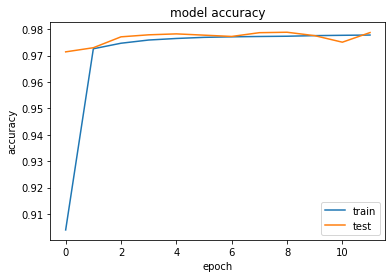

In [141]:
# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#show in the graph below the acurracy on both the trained and validated
#has a ever so slight increase, meaning the model could be trained longer
#to increase the accuracy of the model.It can also be seen that the model
#has not been over or under fitted as both show some comparable skill.

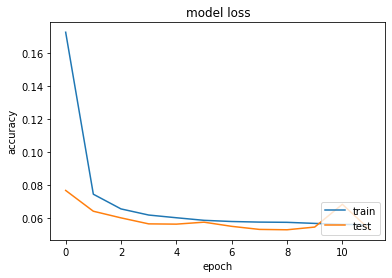

In [142]:
# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#show in the graph below the acurracy on both the trained and validated
#has a ever so slight increase, meaning the model could be trained longer
#to increase the accuracy of the model.It can also be seen that the model
#has not been over or under fitted as both show some comparable skill.